In [13]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Import libraries

In [14]:
import os
import numpy as np
import pandas as pd
# import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, laplace, gmean
from tqdm.notebook import tqdm
from scipy.stats import gaussian_kde

# List of assets to be considered

In [22]:
asset_list = [
    "DBA",
    "DBB",
    "GLD",
    "USO",
    "URA",
    "SPY",
    "TLT",
]

from scripts.update_data import update_daily_price_data_yahoo

asset_price_data = dict()
for ticker in asset_list:
    update_daily_price_data_yahoo(ticker)
    asset_price_data[ticker] = pd.read_pickle(f'./data/daily_price/yahoo_finance/{ticker}.pkl')
    print(ticker)
    display(asset_price_data[ticker])

DBA


,open,high,low,close,adj_close,volume
datetime,,,,,,
2007-01-05,24.930000,25.049999,24.850000,25.020000,21.559393,27800
2007-01-08,25.940001,25.940001,24.840000,24.980000,21.524925,143600
2007-01-09,24.799999,24.820000,24.600000,24.660000,21.249186,136700
2007-01-10,24.700001,24.820000,24.500000,24.730000,21.309505,76600
2007-01-11,24.900000,25.129999,24.799999,25.100000,21.628330,159600
...,...,...,...,...,...,...
2025-01-17,26.570000,26.680000,26.540001,26.600000,26.600000,360300
2025-01-21,26.879999,26.940001,26.799999,26.920000,26.920000,268900
2025-01-22,26.990000,27.240000,26.990000,27.219999,27.219999,401100


DBB


,open,high,low,close,adj_close,volume
datetime,,,,,,
2007-01-05,24.100000,24.100000,23.299999,23.709999,18.858978,184600
2007-01-08,34.110001,34.110001,23.389999,23.389999,18.604450,10200
2007-01-09,22.900000,23.389999,22.900000,23.270000,18.509003,4700
2007-01-10,23.549999,24.219999,23.549999,24.219999,19.264635,10900
2007-01-11,24.049999,24.850000,24.049999,24.540001,19.519165,116100
...,...,...,...,...,...,...
2025-01-17,19.209999,19.400000,19.209999,19.350000,19.350000,61700
2025-01-21,19.320000,19.320000,19.260000,19.270000,19.270000,164700
2025-01-22,19.240000,19.240000,19.150000,19.160000,19.160000,22400


GLD


,open,high,low,close,adj_close,volume
datetime,,,,,,
2004-11-18,44.430000,44.490002,44.070000,44.380001,44.380001,5992000
2004-11-19,44.490002,44.919998,44.470001,44.779999,44.779999,11655300
2004-11-22,44.750000,44.970001,44.740002,44.950001,44.950001,11996000
2004-11-23,44.880001,44.919998,44.720001,44.750000,44.750000,3169200
2004-11-24,44.930000,45.049999,44.790001,45.049999,45.049999,6105100
...,...,...,...,...,...,...
2025-01-17,249.699997,250.809998,249.149994,249.270004,249.270004,8312900
2025-01-21,251.949997,253.360001,251.830002,253.130005,253.130005,7668100
2025-01-22,254.289993,254.679993,253.779999,254.429993,254.429993,5213800


USO


,open,high,low,close,adj_close,volume
datetime,,,,,,
2006-04-10,546.000000,548.000000,541.359985,544.159973,544.159973,484738
2006-04-11,546.559998,547.119995,538.400024,545.599976,545.599976,162138
2006-04-12,545.760010,550.479980,542.479980,542.719971,542.719971,156038
2006-04-13,540.000000,551.919983,539.200012,550.559998,550.559998,70088
2006-04-17,553.599976,559.200012,549.440002,558.320007,558.320007,114713
...,...,...,...,...,...,...
2025-01-17,82.519997,83.000000,82.230003,82.519997,82.519997,2297600
2025-01-21,80.620003,81.339996,80.449997,81.110001,81.110001,2410900
2025-01-22,80.720001,81.209999,80.320000,80.430000,80.430000,2798000


URA


,open,high,low,close,adj_close,volume
datetime,,,,,,
2010-11-05,103.440002,103.440002,99.480003,103.260002,69.925392,48233
2010-11-08,104.699997,114.779999,103.919998,114.779999,77.726479,255017
2010-11-09,116.160004,119.519997,109.800003,111.000000,75.166748,334967
2010-11-10,111.959999,113.099998,108.000000,112.739998,76.345047,121967
2010-11-11,114.000000,114.120003,111.120003,113.699997,76.995140,111767
...,...,...,...,...,...,...
2025-01-17,27.680000,28.320000,27.360001,28.030001,28.030001,3719600
2025-01-21,28.209999,29.190001,28.209999,29.180000,29.180000,4452600
2025-01-22,29.750000,30.900000,29.520000,30.350000,30.350000,6595900


SPY


,open,high,low,close,adj_close,volume
datetime,,,,,,
1993-01-29,43.968750,43.968750,43.750000,43.937500,24.526085,1003200
1993-02-01,43.968750,44.250000,43.968750,44.250000,24.700506,480500
1993-02-02,44.218750,44.375000,44.125000,44.343750,24.752859,201300
1993-02-03,44.406250,44.843750,44.375000,44.812500,25.014492,529400
1993-02-04,44.968750,45.093750,44.468750,45.000000,25.119171,531500
...,...,...,...,...,...,...
2025-01-17,596.960022,599.359985,595.609985,597.580017,597.580017,58070600
2025-01-21,600.669983,603.059998,598.669983,603.049988,603.049988,42532900
2025-01-22,605.919983,607.820007,605.359985,606.440002,606.440002,48196000


TLT


,open,high,low,close,adj_close,volume
datetime,,,,,,
2002-07-30,81.750000,81.900002,81.519997,81.519997,38.279362,6100
2002-07-31,81.949997,82.800003,81.900002,82.529999,38.753597,29400
2002-08-01,82.540001,83.019997,82.540001,83.000000,38.974312,25000
2002-08-02,83.160004,84.099998,82.879997,83.849998,39.373455,52800
2002-08-05,84.040001,84.440002,83.849998,84.220001,39.547184,61100
...,...,...,...,...,...,...
2025-01-17,87.430000,87.480003,87.040001,87.190002,87.190002,29875600
2025-01-21,87.889999,88.169998,87.629997,87.970001,87.970001,30548600
2025-01-22,87.870003,87.980003,87.320000,87.510002,87.510002,25278400


# Function to run backtest

In [57]:
from scripts.trend_strategy import MultiAssetTrendStrategy
import backtrader as bt
import pandas as pd

def run_backtest(
    tickers, 
    initial_capital, 
    verbose, 
    rebalance_days, 
    fast_period, 
    slow_period, 
    atr_period, 
    fast_period_weight, 
    dataframes,
    asset_directions,
):
    """
    Run backtest for MultiAssetTrendStrategy and return performance metrics.
    
    Args:
        tickers (list): List of asset symbols
        initial_capital (float): Starting portfolio value
        verbose (bool): Enable strategy logging
        rebalance_days (int): Frequency of portfolio rebalancing
        fast_period (int): Short-term momentum period
        slow_period (int): Long-term momentum period
        atr_period (int): Volatility measurement period
        fast_period_weight (float): Weight for fast momentum signal
        dataframes (dict): Dictionary of OHLC DataFrames keyed by ticker
        
    Returns:
        dict: Dictionary containing CAGR, volatility, and max drawdown
    """
    
    # Initialize backtrader engine
    cerebro = bt.Cerebro(stdstats=False)
    
    # Add data feeds
    for ticker in tickers:
        df = dataframes[ticker]
        data = bt.feeds.PandasData(
            dataname=df,
            datetime=None,  # Use DataFrame index as datetime
            open='open',
            high='high',
            low='low',
            close='close',
            volume='volume',
            name=ticker,
        )
        cerebro.adddata(data)

    # Add strategy with parameters
    cerebro.addstrategy(
        MultiAssetTrendStrategy,
        tickers=tickers,
        initial_capital=initial_capital,
        verbose=verbose,
        rebalance_days=rebalance_days,
        fast_period=fast_period,
        slow_period=slow_period,
        atr_period=atr_period,
        fast_period_weight=fast_period_weight,
        asset_directions=asset_directions,
    )

    # Configure broker
    cerebro.broker.setcash(initial_capital)
    cerebro.broker.setcommission(commission=0.000, margin=0.05)  # 0.1% commission
    
    # Add performance analyzers
    cerebro.addanalyzer(bt.analyzers.DrawDown, _name='drawdown')
    cerebro.addanalyzer(bt.analyzers.TimeReturn, timeframe=bt.TimeFrame.Days, _name='timereturn')

    # Execute backtest
    results = cerebro.run()
    strat = results[0]
    
    # Create history DataFrame
    history_df = pd.DataFrame(strat.history)
    if not history_df.empty:
        history_df.set_index('date', inplace=True)
        history_df.index = pd.to_datetime(history_df.index)

    # Calculate performance metrics
    cagr = (history_df['portfolio_value'].iloc[-1] / history_df['portfolio_value'].iloc[0]) ** (252 / len(history_df)) - 1
    volatility = history_df['portfolio_value'].pct_change().std() * (252 ** 0.5)
    max_drawdown = strat.analyzers.drawdown.get_analysis()['max']['drawdown']
    return {
        'cagr': cagr,
        'volatility': volatility,
        'max_drawdown': max_drawdown,
        'sharpe': cagr / volatility,
        'history_df': history_df
    }

    plt.plot(history_df.index, history_df['portfolio_value'] / history_df['portfolio_value'].iloc[0])
    plt.show()

# Sample run

{'cagr': 0.05373535086776693, 'volatility': 0.13714894157086188, 'max_drawdown': 30.85114788691286, 'sharpe': 0.39180288416592, 'history_df':             portfolio_value       SPY_pnl  SPY_dividend   SPY_price
date                                                               
1994-01-27     1.000000e+06      0.000000           0.0   47.750000
1994-01-28     9.986816e+05   2636.750000           0.0   47.875000
1994-01-31     1.005933e+06   7251.062500           0.0   48.218750
1994-02-01     1.000659e+06  -5273.500000           0.0   47.968750
1994-02-02     1.007251e+06   6591.875000           0.0   48.281250
...                     ...           ...           ...         ...
2025-01-17     4.968643e+06  49135.700195           0.0  597.580017
2025-01-21     5.013890e+06  45247.597656           0.0  603.049988
2025-01-22     5.041933e+06  28042.201172           0.0  606.440002
2025-01-23     5.069313e+06  27380.299805           0.0  609.750000
2025-01-24     5.054588e+06 -14724.402344 

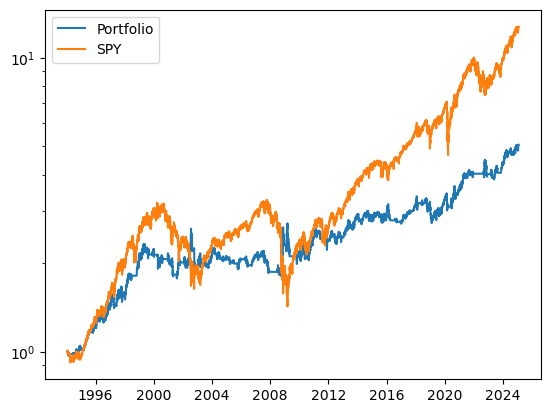

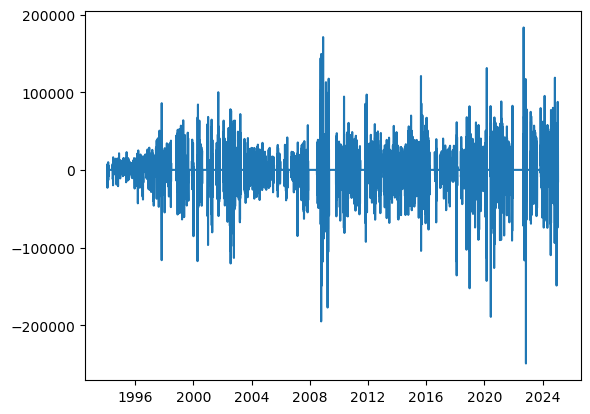

In [38]:
ticker_list = ['SPY']
ticker_price_data = {
    ticker: asset_price_data[ticker] for ticker in ticker_list
}
results = run_backtest(
    tickers=ticker_list,
    initial_capital=1000000,
    verbose=False,
    rebalance_days=30,
    fast_period=21,
    slow_period=252,
    atr_period=21,
    fast_period_weight=0.5,
    dataframes=ticker_price_data,
)

print(results)
df = results['history_df']
plt.plot(df.index, df['portfolio_value'] / df['portfolio_value'].iloc[0])
plt.plot(df.index, df['SPY_price'] / df['SPY_price'].iloc[0])
plt.legend(['Portfolio', 'SPY'])
plt.yscale('log')
plt.show()

plt.plot(df.index, df['SPY_pnl'])
plt.show()

# Utility functions

## Graph plotting

In [45]:
def plot_graphs(x, y, x_label):
    plt.plot(x, [f['cagr'] for f in y])
    plt.xlabel(x_label)
    plt.ylabel('cagr %')
    plt.show()

    plt.plot(x, [f['volatility'] for f in y])
    plt.xlabel(x_label)
    plt.ylabel('volatility %')
    plt.show()

    plt.plot(x, [f['sharpe'] for f in y])
    plt.xlabel(x_label)
    plt.ylabel('sharpe ratio')
    plt.show()

    plt.plot(x, [f['max_drawdown'] for f in y])
    plt.xlabel(x_label)
    plt.ylabel('max drawdown%')
    plt.show()

# Single Asset

## SPY

In [40]:
ticker_list = ['SPY']
ticker_price_data = {
    ticker: asset_price_data[ticker] for ticker in ticker_list
}

### Single period moving average

#### Effect of moving average window size

  0%|          | 0/247 [00:00<?, ?it/s]

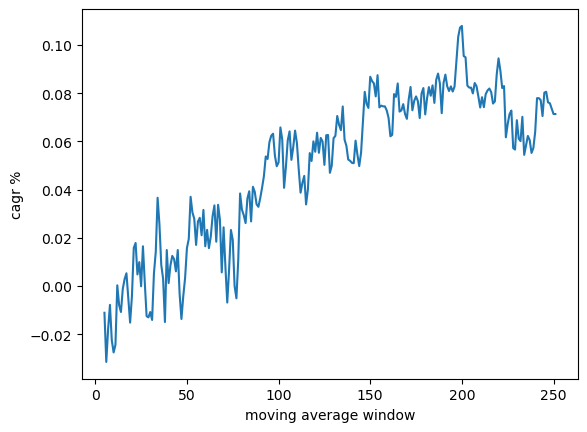

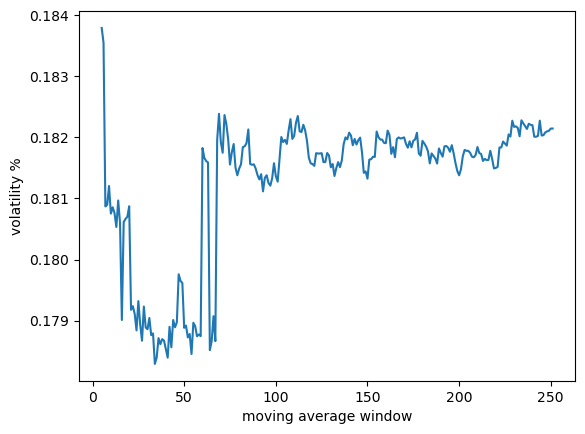

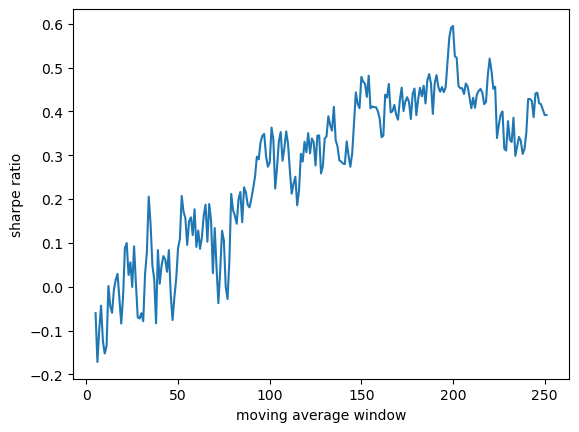

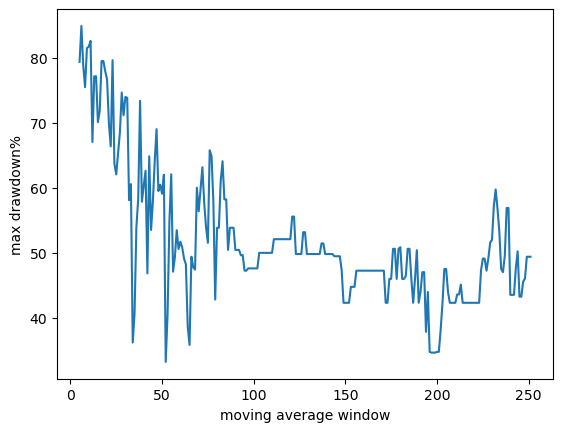

In [52]:
x = range(5, 252)
y = []
for i in tqdm(x):
    results = run_backtest(
        tickers=ticker_list,
        initial_capital=1000000,
        verbose=False,
        rebalance_days=30,
        fast_period=i,
        slow_period=252,
        atr_period=21,
        fast_period_weight=1.0,
        dataframes=ticker_price_data,
    )
    y.append(results)

plot_graphs(x, y, "moving average window")


#### Effect of rebalancing frequency

  0%|          | 0/247 [00:00<?, ?it/s]

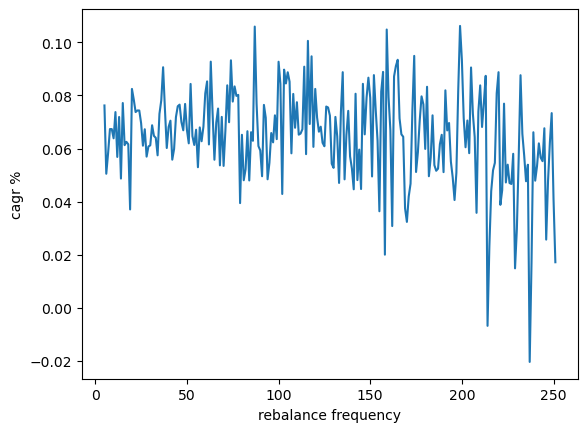

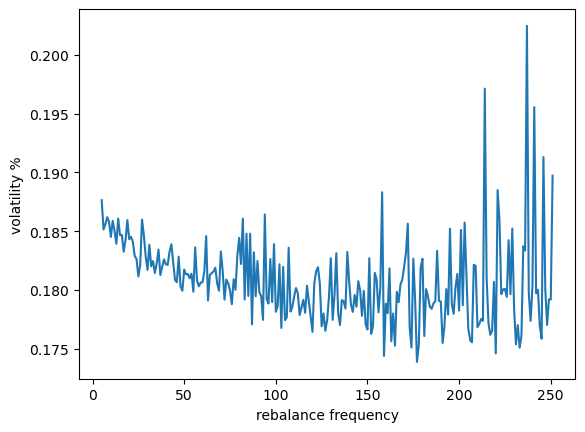

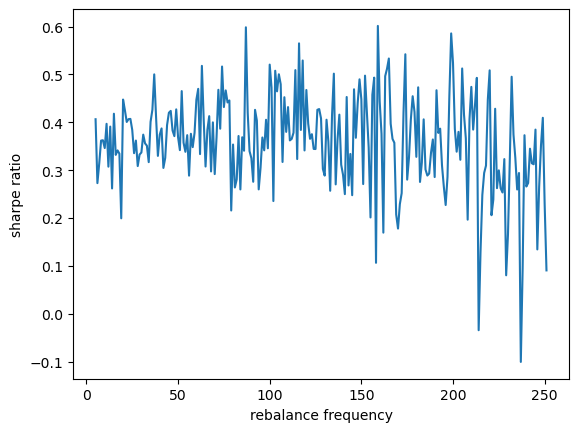

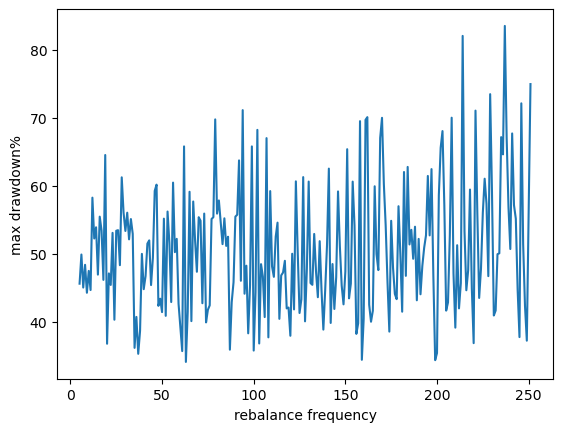

In [51]:
x = range(5, 252)
y = []
for i in tqdm(x):
    results = run_backtest(
        tickers=ticker_list,
        initial_capital=1000000,
        verbose=False,
        rebalance_days=i,
        fast_period=200,
        slow_period=200,
        atr_period=21,
        fast_period_weight=1.0,
        dataframes=ticker_price_data,
    )
    y.append(results)

plot_graphs(x, y, "rebalance frequency")

#### Effect of direction

  0%|          | 0/100 [00:00<?, ?it/s]

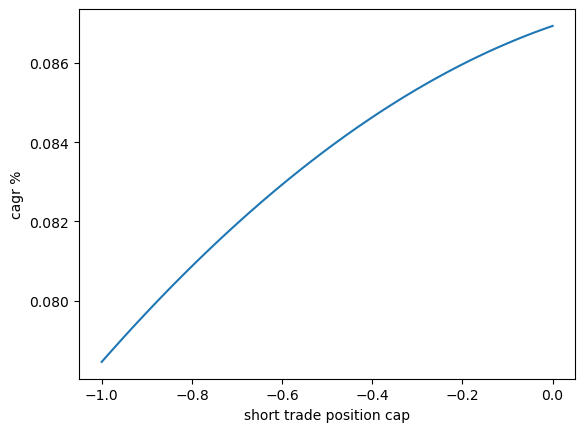

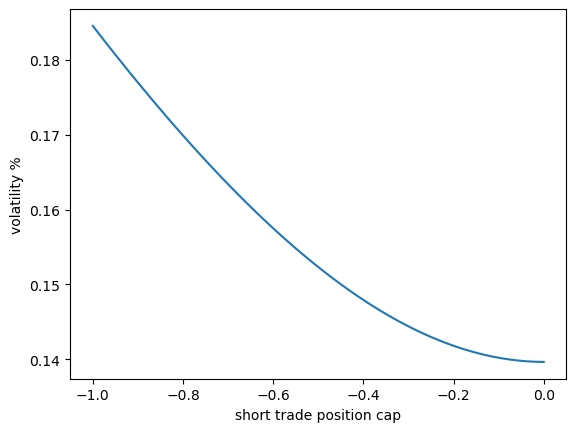

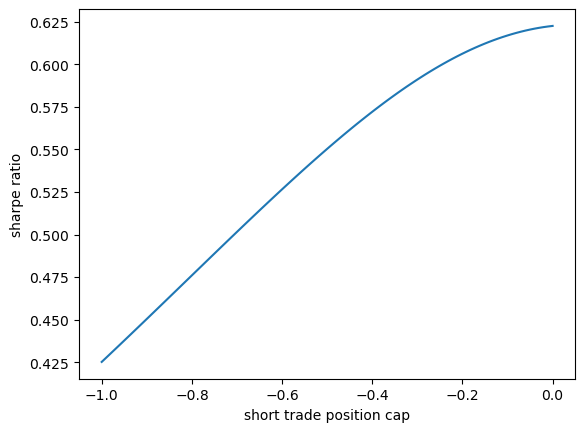

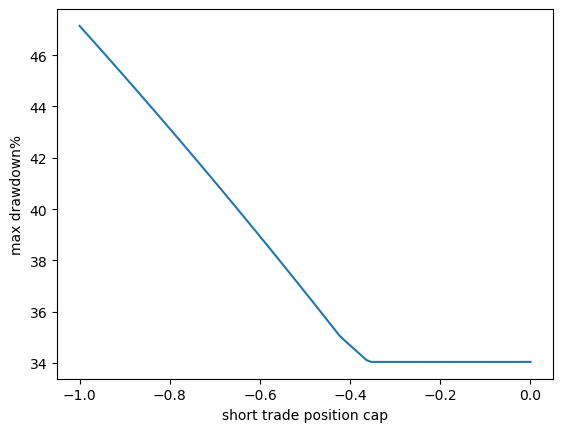

In [68]:
x = np.linspace(-1, 0, 100)
y = []
for i in tqdm(x):
    results = run_backtest(
        tickers=ticker_list,
        initial_capital=1000000,
        verbose=False,
        rebalance_days=21,
        fast_period=200,
        slow_period=200,
        atr_period=21,
        fast_period_weight=1.0,
        dataframes=ticker_price_data,
        asset_directions={"SPY": (i, 1)}
    )
    y.append(results)

plot_graphs(x, y, "short trade position cap")

# END

  0%|          | 0/100 [00:00<?, ?it/s]

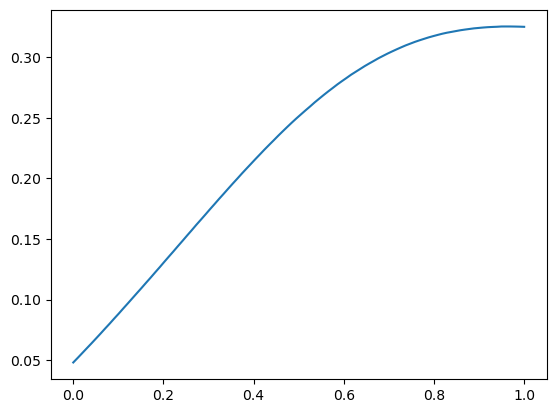

In [18]:
import numpy as np
import matplotlib.pyplot as plt

x = []
y = []

for i in tqdm(np.linspace(0, 1, 100)):
    results = run_backtest(
        tickers=asset_list,
        initial_capital=1000000,
        verbose=False,
        rebalance_days=30,
        fast_period=21,
        slow_period=252,
        atr_period=21,
        fast_period_weight=i,
        dataframes=price_data,
    )

    x.append(i)
    y.append(results["sharpe"])

plt.plot(x, y)
plt.show()



In [19]:
results = run_backtest(
    tickers=asset_list,
    initial_capital=1000000,
    verbose=False,
    rebalance_days=30,
    fast_period=21,
    slow_period=252,
    atr_period=21,
    fast_period_weight=0.8,
    dataframes=price_data,
)

df = results['history_df']


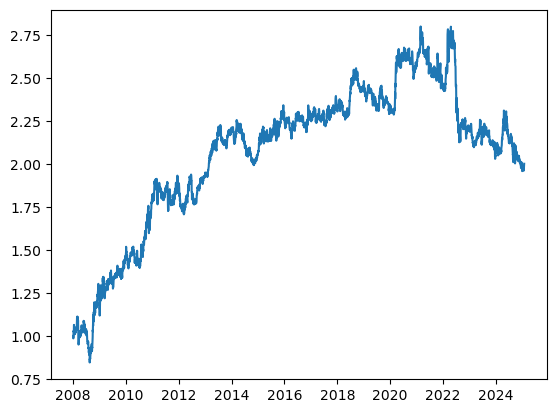

In [20]:
plt.plot(df.index, df['portfolio_value'] / df['portfolio_value'].iloc[0])
plt.show()

In [21]:
# Main function to run backtest
def backtest_trend_strategy(tickers, dataframes, rebalance_days, weights, initial_capital, plot=False, verbose=False):
    cerebro = bt.Cerebro()

    cerebro.broker.setcommission(commission=0.000, margin=0.5)

    # Add strategy
    cerebro.addstrategy(
        MultiAssetTrendStrategy,
        tickers=tickers,
        dataframes=dataframes,
        rebalance_days=rebalance_days,
        weights=weights,
        initial_capital=initial_capital,
        verbose=verbose,
        # fast_period=21,
        # slow_period=252
    )

    # Load data
    for ticker, df in dataframes.items():
        data = bt.feeds.PandasData(dataname=df, name=ticker)
        cerebro.adddata(data)

    # Set initial capital
    cerebro.broker.setcash(initial_capital)

    # Run backtest
    strategies = cerebro.run()
    strategy = strategies[0]

    # Plot results with adjusted viewing window
    if plot:
        cerebro.plot()

    # Extract portfolio history
    portfolio_history = pd.DataFrame(strategy.portfolio_history)
    portfolio_history.set_index('datetime', inplace=True)
    portfolio_history['total_cumulative_returns'] = (portfolio_history['portfolio_value'] / initial_capital) - 1
    portfolio_history['pnl'] = portfolio_history['portfolio_value'] - initial_capital
    drawdown = (portfolio_history['total_cumulative_returns'].cummax() - portfolio_history['total_cumulative_returns']) / (portfolio_history['total_cumulative_returns'].cummax() + 1)
    portfolio_history['drawdown'] = drawdown

    # print(portfolio_history)

    for ticker in tickers:
        # Calculate daily and cumulative returns for each asset
        portfolio_history[f'price_{ticker}'] = strategy.asset_daily_prices[ticker]
        portfolio_history[f'daily_returns_{ticker}'] = portfolio_history[f'price_{ticker}'].pct_change()
        portfolio_history[f'cumulative_returns_{ticker}'] = (portfolio_history[f'price_{ticker}'] / portfolio_history[f'price_{ticker}'].iloc[0]) - 1

        portfolio_history[f'value_{ticker}'] = portfolio_history['asset_values'].apply(lambda x: x[ticker])
        portfolio_history[f'weight_{ticker}'] = portfolio_history['asset_weights'].apply(lambda x: x[ticker])

        # Add PnL attributed to each asset
        portfolio_history[f'pnl_{ticker}'] = strategy.asset_pnl[ticker]
        portfolio_history[f'cumulative_pnl_{ticker}'] = portfolio_history[f'pnl_{ticker}'].cumsum()

    # Calculate metrics
    metrics = calculate_performance_metrics(portfolio_history)

    return portfolio_history, metrics